# Best practices for constructing, preparing, and evaluating protein-ligand binding affinity benchmarks

### DavidHahn1*, HannahE.BruceMacdonald2, LauraPerezBenito3, JohnD.Chodera2, AntoniaS.J.S.Mey4, DavidL.Mobley5, GaryTresadern6

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [6]:
### TOY DATA TO PLOT

y = [-1.61, 0.59, 0.81, -0.17, 2.49, 0.07, -0.44, -0.19, 0.89, 2.00, 1.13, 0.35, -0.37, -0.54, -1.01, 0.12, 1.12, 1.02, 2.20, 1.68, 0.61, 2.74, -0.67, -0.00]
x = [-1.28, 1.79, -0.16, 0.22, 2.36, 0.79, 0.02, -0.42, 0.30, 0.75, 1.32, 1.77, -0.39, -0.78, -0.54, -0.76, -0.04, -0.57, 0.95, -0.49, -2.49, 1.79, 1.44, 1.23]
errors = [np.random.normal(0.3,0.2) for _ in x]

#### Figure XX Measuring success section


A) correct plot style

B + C) x !=y because of limits (B) and plot shape (C)

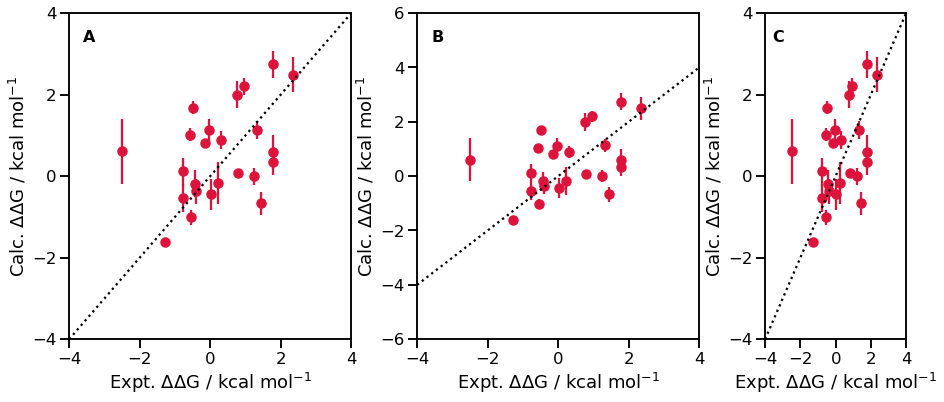

In [7]:
# sns.set_context('talk')

f, axes = plt.subplots(1,3, gridspec_kw={'width_ratios': [1, 1, 0.5]},figsize=(15,6))


for i, label in enumerate(('A', 'B', 'C')):
        axes[i].errorbar(x, y,yerr=errors,linestyle='none',color='crimson')
        axes[i].scatter(x, y,color='crimson')

        xlimit = axes[i].get_xlim()
        ylimit = axes[i].get_ylim()
        limit = (np.floor(min([xlimit[0],ylimit[0]])-0.5),np.ceil(max([xlimit[1],ylimit[1]])+0.5))
        axes[i].plot(limit,limit, 'k:')
        axes[i].set_xticks(np.arange(limit[0],limit[1]+1, 2.0))
        axes[i].set_yticks(np.arange(limit[0],limit[1]+1, 2.0))

        axes[i].set_xlim(limit)
        axes[i].set_ylim(limit)
        
        axes[i].set_xlabel('Expt. '+r'$\Delta\Delta$G'+' / kcal mol'+r'$^{-1}$')
        axes[i].set_ylabel('Calc. '+r'$\Delta\Delta$G'+' / kcal mol'+r'$^{-1}$')

        axes[i].text(0.05, 0.95, label, transform=axes[i].transAxes,
          fontsize=16, fontweight='bold', va='top')
        
axes[1].set_ylim(-6,6)
axes[1].set_yticks(np.arange(-6,7, 2.0))

plt.subplots_adjust(wspace=0.28)
plt.savefig('plotting-basics.png')
plt.show()


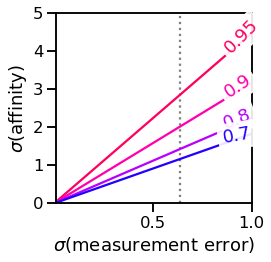

In [8]:
desired_R_max = [0.7, 0.8, 0.9, 0.95]
measurement_error = np.linspace(0.01,1.,20)

from matplotlib import cm 

cmap = cm.get_cmap('hsv')

rgba = cmap(0.5)

plt.figure(figsize=(3.5,3.5))

angle = np.linspace(45, 10, 4)

for i, Rmax in enumerate(desired_R_max[::-1],1):
    y = []
    for m in measurement_error:
        aff = m / (1-Rmax)**0.5
        y.append(aff)
    plt.plot(measurement_error,y,color=cmap(Rmax))
    plt.text(measurement_error[-3]-0.05, y[-3]-0.05,f'{Rmax}',color=cmap(Rmax), rotation=angle[i-1], bbox=dict(fc='white',ec='white',alpha=0.9))
        
plt.xlabel(r'$\sigma(\mathrm{measurement\ error})$')
plt.ylabel(r'$\sigma(\mathrm{affinity})$')

plt.vlines(0.64,0,5,linestyles='dotted',color='grey')
plt.ylim(0,5)
plt.xlim(measurement_error[0],measurement_error[-1])

# plt.show()
plt.savefig('R2max.pdf')